### **Exploring Diversity Dynamics: A Comparative Analysis of Boards of Directors and Executive Committees**
### Strategic Human Resource Management - Group 7

The purpose of this analysis is to explore the dynamics of diversity within the top leadership structures of organizations, specifically focusing on the **Boards of Directors** and **Executive Committees**. Diversity—measured through dimensions such as gender, nationality, age, education, and seniority—is a critical factor influencing corporate governance, decision-making, and organizational culture. This study aims to determine whether the diversity observed on Boards of Directors aligns with or differs from that on Executive Committees, and whether any patterns of similarity or disparity can be identified.

Additionally, the analysis examines whether the diversity on Boards of Directors affects the diversity on Executive Committees, considering potential phenomena like homophily (similarity among members) or heterophily (diversity among members). Beyond identifying these patterns, the study investigates how external factors such as size of the work force may explain these differences.

The broader objective is to build a typology of employers based on their diversity practices and structures, providing insights into the implications of leadership diversity for organizational success and inclusivity. 

Let's start of by taking a look at our datasets and the columns that we are dealing with.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [4]:

df = pd.read_excel('Data_Cleaned02.xlsx')  
df = df.iloc[:, :14]
df.head()



,Company Code,Company,Corporate Governance Body,Name,Function,Sex,Nationality,Year of Birth,Age in 2024,Highest Degree,Educational Field,Institution,Year in function,Years in the company
0,109,Merck,Board of Directors,Wolfgang Büchele,Chair of the Supervisory Board,M,German,1959,65,PhD,Chemistry,University of Ulm,1,15
1,109,Merck,Board of Directors,Sascha Held,Vice Chair of the Supervisory Board,M,German,1982,42,Bachelor,IT,University of Applied Sciences Darmstadt,5,22
2,109,Merck,Board of Directors,Gabriele Eismann,Member of the Board of Directors,F,German,1961,63,PhD,Chemistry,"University of Hannover, University of Leipzig",10,33
3,109,Merck,Board of Directors,Barbara Lambert,Member of the Board of Directors,F,German,1962,62,Bachelor,Economics,University of Geneva,1,1
4,109,Merck,Board of Directors,Birgit Biermann,Member of the Board of Directors,F,German,1973,51,Master,Law,Ruhr-University of Bochum,2,2


Below is a description of each column in the dataset:

1. **Company Code**: A unique identifier assigned to each company in the dataset for easy reference.

2. **Company**: The name of the company to which the governance body member belongs.

3. **Corporate Governance Body**: Specifies the governance structure the individual is part of, such as the **Board of Directors** or **Executive Committee**.

4. **Name**: The full name of the individual serving in the governance role.

5. **Function**: The specific role or title held by the individual within the governance body (e.g., CEO, CFO, Non-Executive Director).

6. **Sex**: The gender of the individual, typically categorized as 'M' for male or 'F' for female.

7. **Nationality**: The nationality or citizenship of the individual.

8. **Year of Birth**: The year the individual was born.

9. **Age in 2024**: The calculated age of the individual in 2024, based on their year of birth.

10. **Highest Degree**: The highest academic qualification attained by the individual (e.g., Bachelor’s, Master’s, PhD).

11. **Educational Field**: The field of study associated with the individual's highest degree (e.g., Business, Engineering, Law).

12. **Institution**: The name of the academic institution where the individual earned their highest degree.

13. **Year in Function**: The year the individual began their current role within the governance body.

14. **Years in the Company**: The total number of years the individual has been associated with the company in any capacity.


Now, to proceed with our analysis, let's compare each feature, or measure of diversity, for both the Board of Director and the Executive Committee for each company.

## Gender

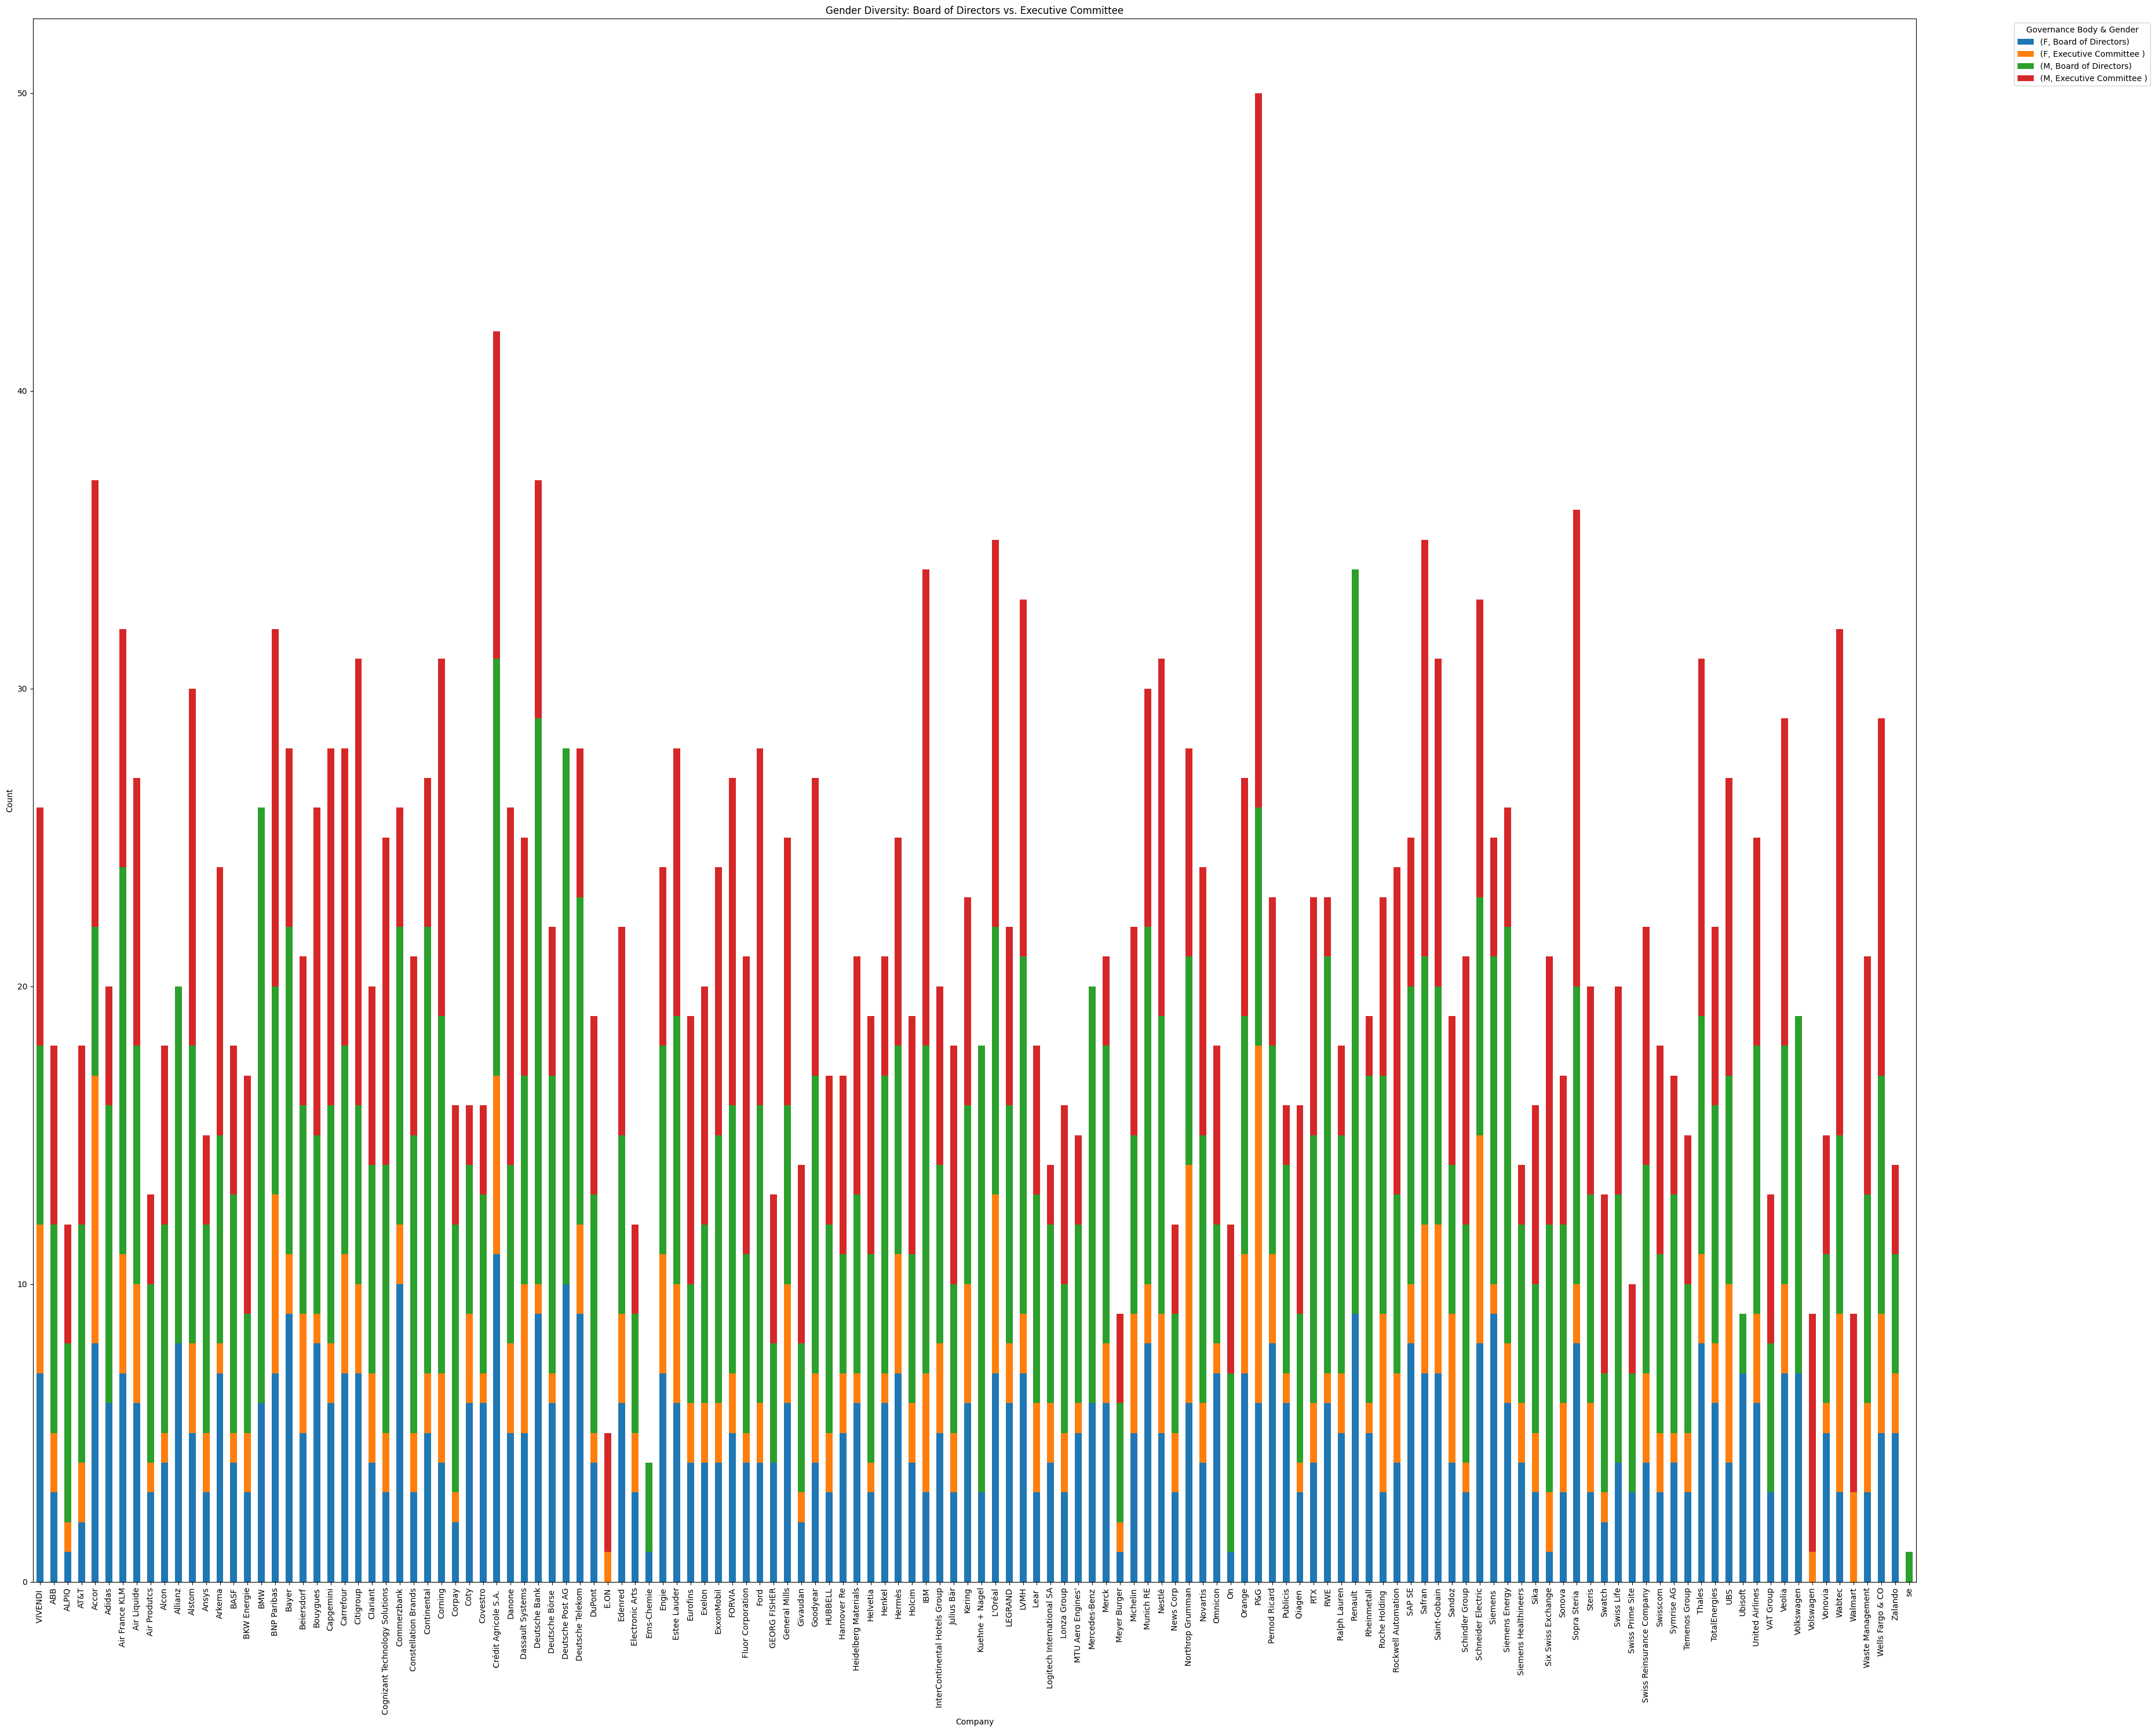

In [5]:
{
    "tags": [
        "hide-input",
    ]
}


# Drop rows with missing values in the specified columns
columns_to_check = ["Company", "Corporate Governance Body", "Sex"]
df_cleaned_selected = df.dropna(subset=columns_to_check)

df=df_cleaned_selected
df["Sex"] = df["Sex"].str.strip()
gender_counts = df.groupby(["Company", "Corporate Governance Body", "Sex"]).size().unstack(fill_value=0)


# Pivot for the stacked bar chart
pivot_data = gender_counts.unstack(level=1).fillna(0)

# Plot stacked bar chart
ax = pivot_data.plot(kind="bar", stacked=True, figsize=(50, 30))

# Customize plot
plt.title("Gender Diversity: Board of Directors vs. Executive Committee")
plt.xlabel("Company")
plt.ylabel("Count")
plt.legend(title="Governance Body & Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Enable scrollable view by expanding figure size
plt.subplots_adjust(left=0.2, right=0.85)

# Show plot
plt.show()

As we can see, the data is very large due to the vast amount of companies present in our dataset. Very difficult to interpret! So, we visualise them on average and get the following:

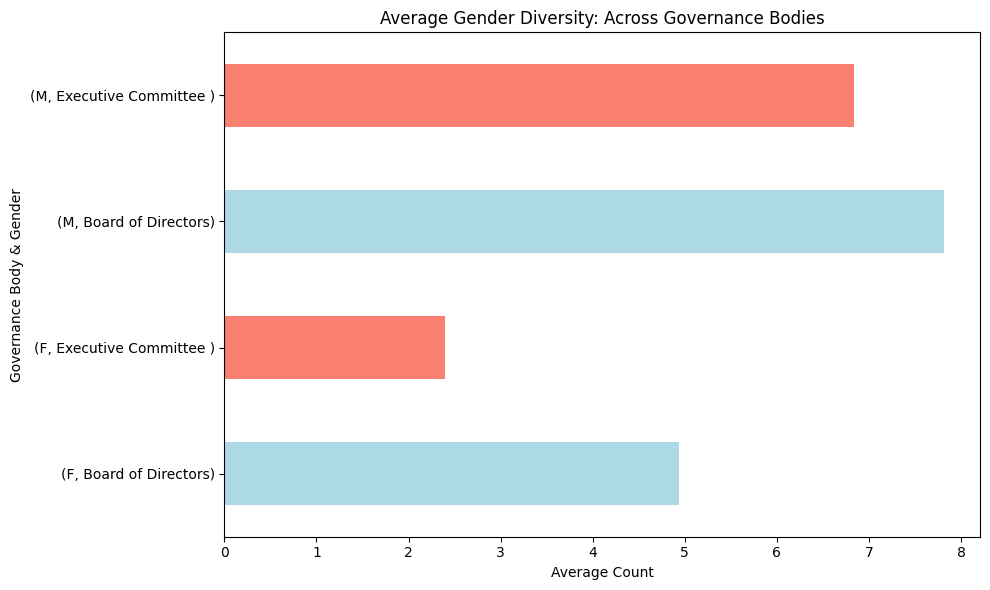

Sex  Corporate Governance Body
F    Board of Directors           4.933824
     Executive Committee          2.397059
M    Board of Directors           7.816176
     Executive Committee          6.838235
dtype: float64

In [6]:
{
    "tags": [
        "hide-input",
    ]
}


average_data = pivot_data.mean()

# Plot the averaged data
fig, ax = plt.subplots(figsize=(10, 6))
average_data.plot(kind="barh", stacked=True, color=["lightblue", "salmon"], ax=ax)

# Customize plot
plt.title("Average Gender Diversity: Across Governance Bodies")
plt.xlabel("Average Count")
plt.ylabel("Governance Body & Gender")
plt.tight_layout()

# Show plot
plt.show()
average_data

Therefore, we can infer that on average...
- There is a higher average count of males compared to females, indicating a male-dominated gender distribution. However, the difference between male and female representation is not as extreme as in the Executive Committee.
- There is a larger gender disparity in the Executive Committee, with males significantly outnumbering females. Female representation is visibly lower compared to their presence on the Board of Directors.
- In comparison, **the Board of Directors appears to have relatively better gender diversity compared to the Executive Committee**. Both governance bodies show male dominance, but the imbalance is more pronounced in the Executive Committee.

It is important to note that in order to **quantitavely measure diversity**, we use the **Shannon Diversity** measure. The Shannon diversity index is a metric commonly used to measure diversity in categorical data, such as the distribution of highest degrees across governance bodies. It quantifies both the richness (number of categories) and evenness (how evenly the members are distributed across these categories). It combines the variety of categories and how uniformly they are represented, providing a holistic view of diversity, it is useful for comparing diversity between groups (e.g., Board of Directors vs. Executive Committee). Also, accounts for minor variations in proportions, give us a nuanced picture of diversity.

## Nationality

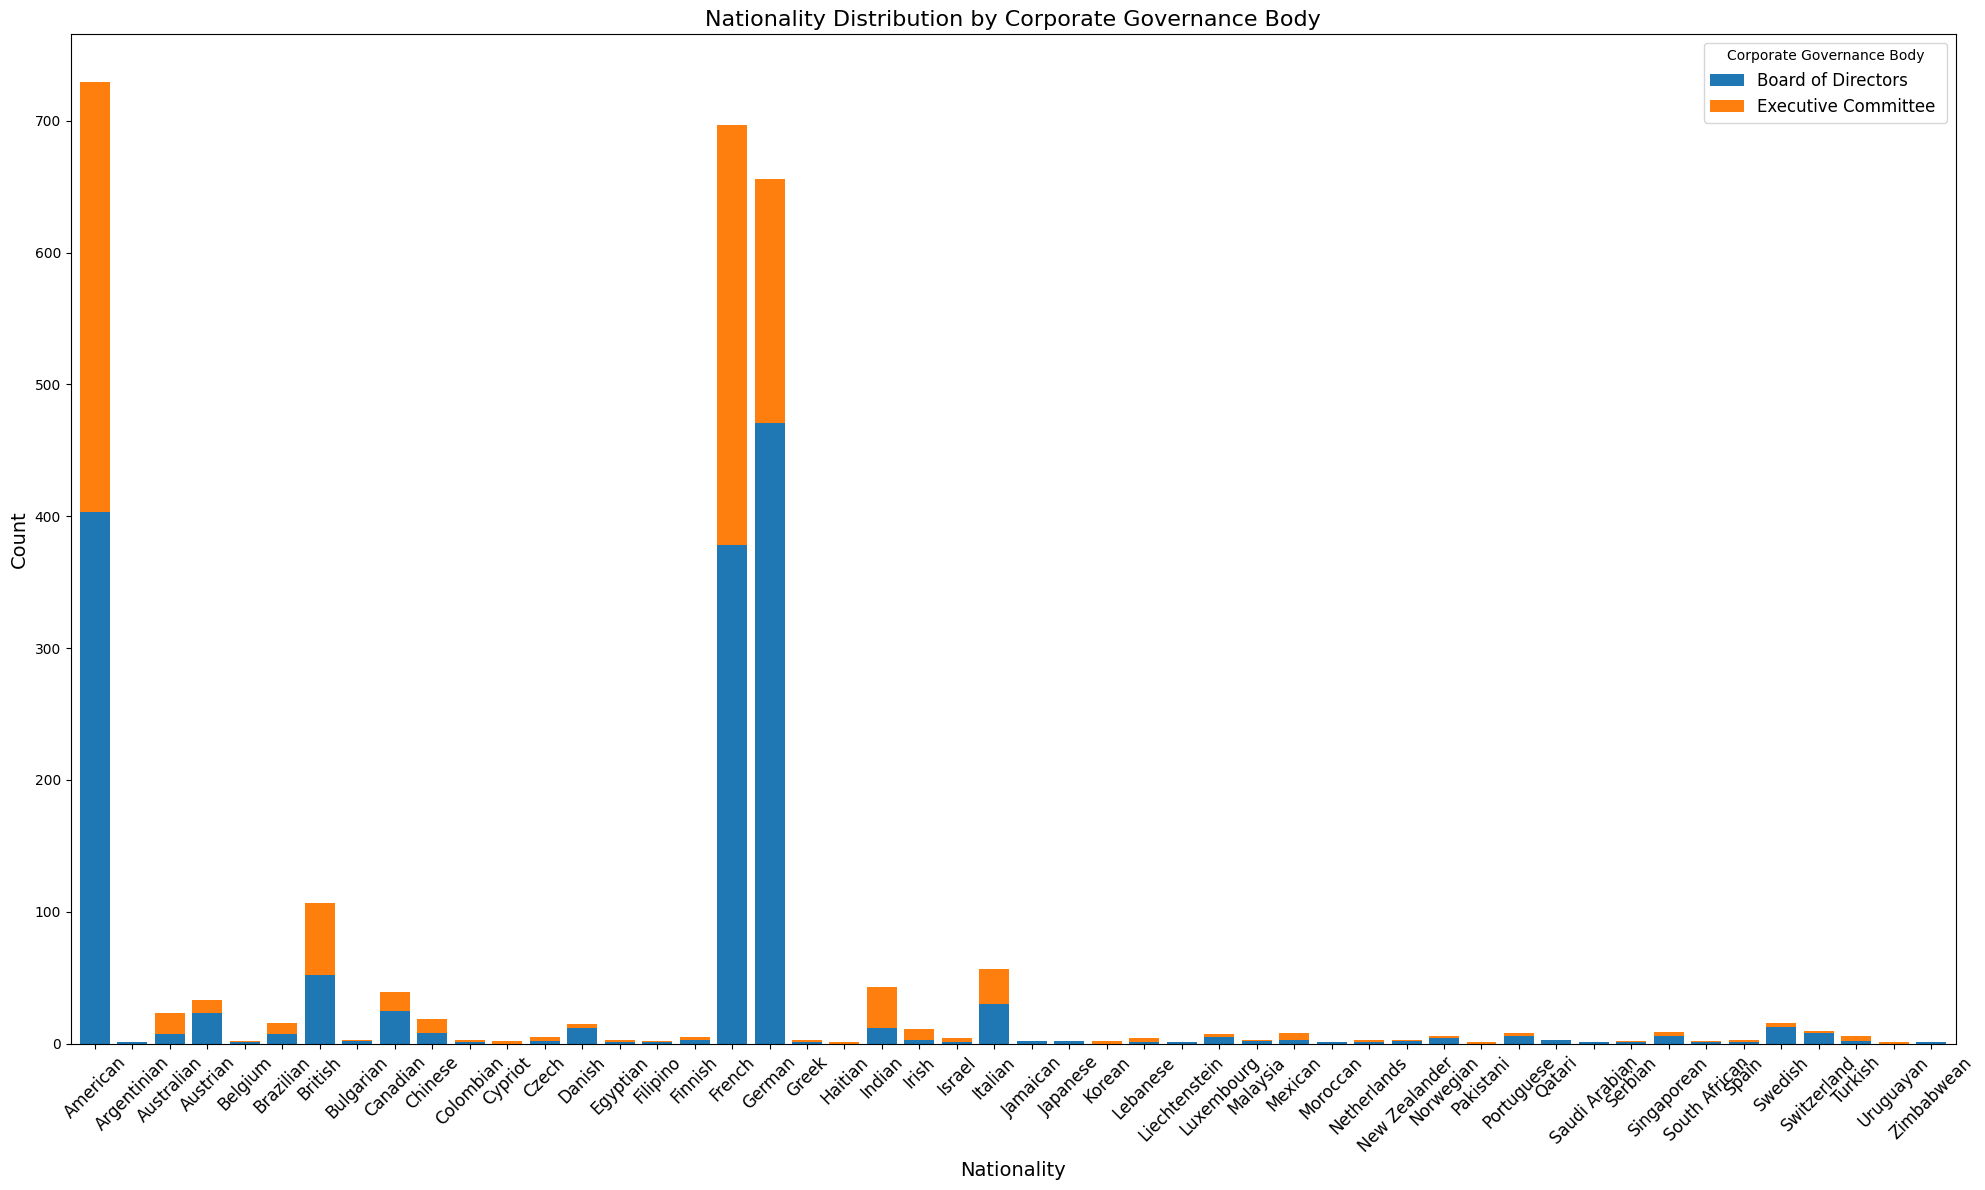

In [7]:

{
    "tags": [
        "hide-input",
    ]
}

nationality_counts = df.groupby(["Nationality", "Corporate Governance Body"]).size().unstack(fill_value=0)
nationality_averages = nationality_counts.mean(axis=0)

def shannon_diversity(counts):
    proportions = counts / counts.sum()
    return -np.sum(proportions * np.log(proportions + 1e-9))

diversity_index = nationality_counts.apply(shannon_diversity, axis=1)


fig, ax = plt.subplots(figsize=(20, 12))
nationality_counts.plot(kind="bar", stacked=True, ax=ax, width=0.8)

# Add titles and labels
plt.title("Nationality Distribution by Corporate Governance Body", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Corporate Governance Body", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


We notice that there are some countries that have value counts too less to consider, so let's focus on the top 10 nationalities to make the analysis more concise.


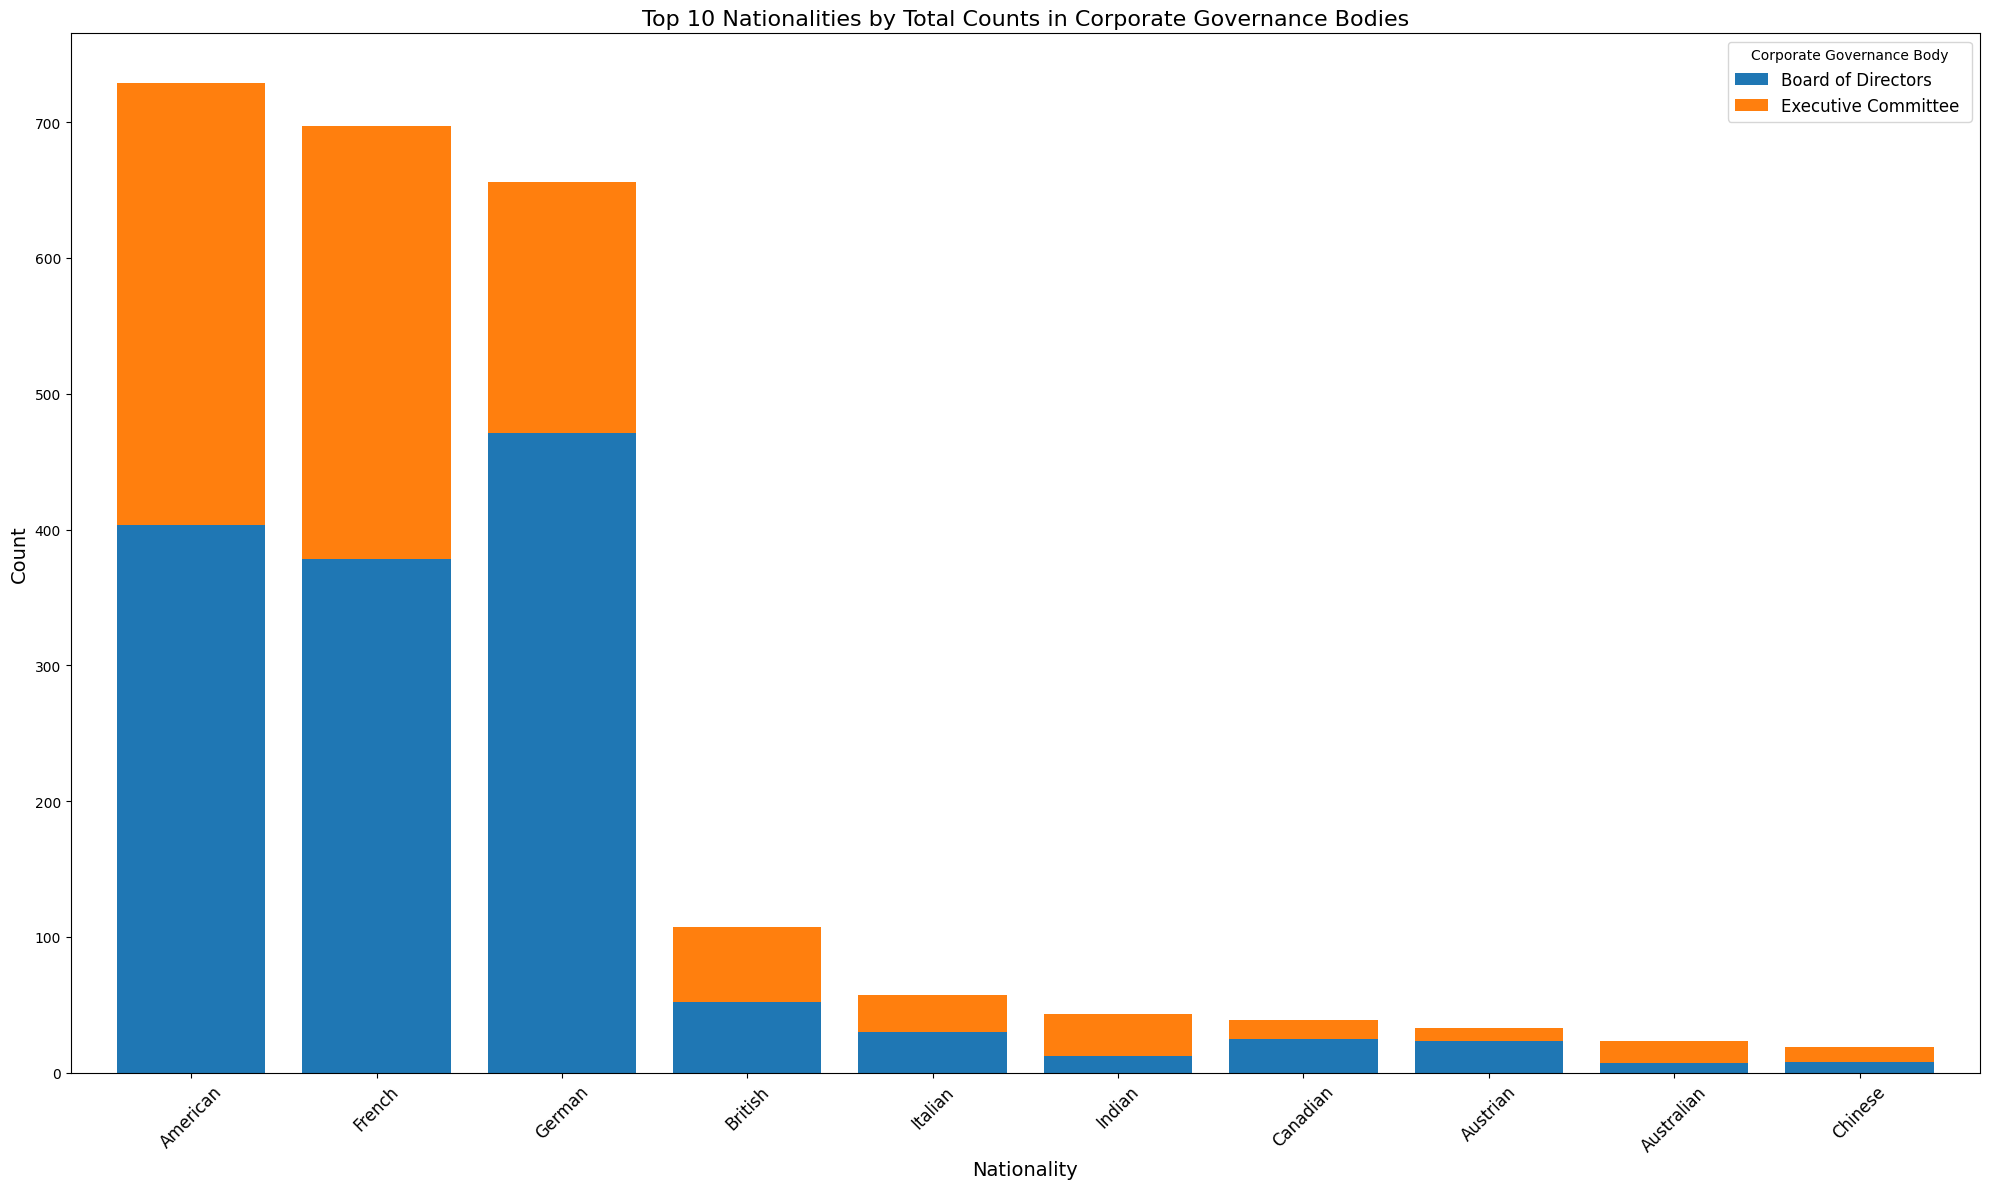

Nationality
American      729
French        697
German        656
British       107
Italian        57
Indian         43
Canadian       39
Austrian       33
Australian     23
Chinese        19
dtype: int64

In [8]:

{
    "tags": [
        "hide-input",
    ]
}

top_10_counts = nationality_counts.sum(axis=1).nlargest(10)

# Visualization for the top 10 by counts
fig, ax = plt.subplots(figsize=(20, 12))
nationality_counts.loc[top_10_counts.index].plot(kind="bar", stacked=True, ax=ax, width=0.8)

# Add titles and labels
plt.title("Top 10 Nationalities by Total Counts in Corporate Governance Bodies", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Corporate Governance Body", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

top_10_counts



### Observations:
1. **Dominance of Western Nationalities**:
   - The dominance of **American**, **French**, and **German** nationalities suggests a strong Western-centric representation in leadership roles.
   - These three groups collectively account for the vast majority of leadership positions, overshadowing all other nationalities combined.

2. **Underrepresentation of Non-Western Nationalities**:
   - Nationalities such as **Indian**, **Chinese**, and **Australian** have very low representation, indicating a lack of diversity from non-Western countries.

3. **Geographic and Operational Influence**:
   - The dominance of Western nationalities could reflect the headquarters' location or operational focus of the companies, which may skew representation toward local talent pools.

4. **Global Inclusivity**:
   - The underrepresentation of nationalities from Asia (e.g., **Chinese**, **Indian**) and other regions highlights a potential gap in inclusive global leadership strategies.



## Education

Now let's move on to education.

In [9]:
{
    "tags": [
        "hide-input",
    ]
}

# Function to classify the highest degree into four categories
def classify_highest_degree_category(degree):
    if pd.isnull(degree) or str(degree).strip() == "":
        return "Other"  # Count empty or null values as "Other"
    degree_lower = str(degree).lower()
    if "bachelor" in degree_lower or "b.sc." in degree_lower or "bsc" in degree_lower or "bachelor " in degree_lower or "bachelor" in degree_lower :
        return "Bachelor"
    elif "master" in degree_lower or "mba" in degree_lower or "executive master" in degree_lower:
        return "Master"
    elif "phd" in degree_lower or "ph.d" in degree_lower or "post-doctoral" in degree_lower:
        return "PhD"
    else:
        return "Other"

# Apply the classification function to the 'Highest Degree' column
df['Highest Degree'] = df['Highest Degree'].apply(classify_highest_degree_category)

# Count the categories
degree_counts = df['Highest Degree'].value_counts()

# Display the counts
print(degree_counts)



Highest Degree
Master      1482
Other        572
Bachelor     500
PhD          436
Name: count, dtype: int64


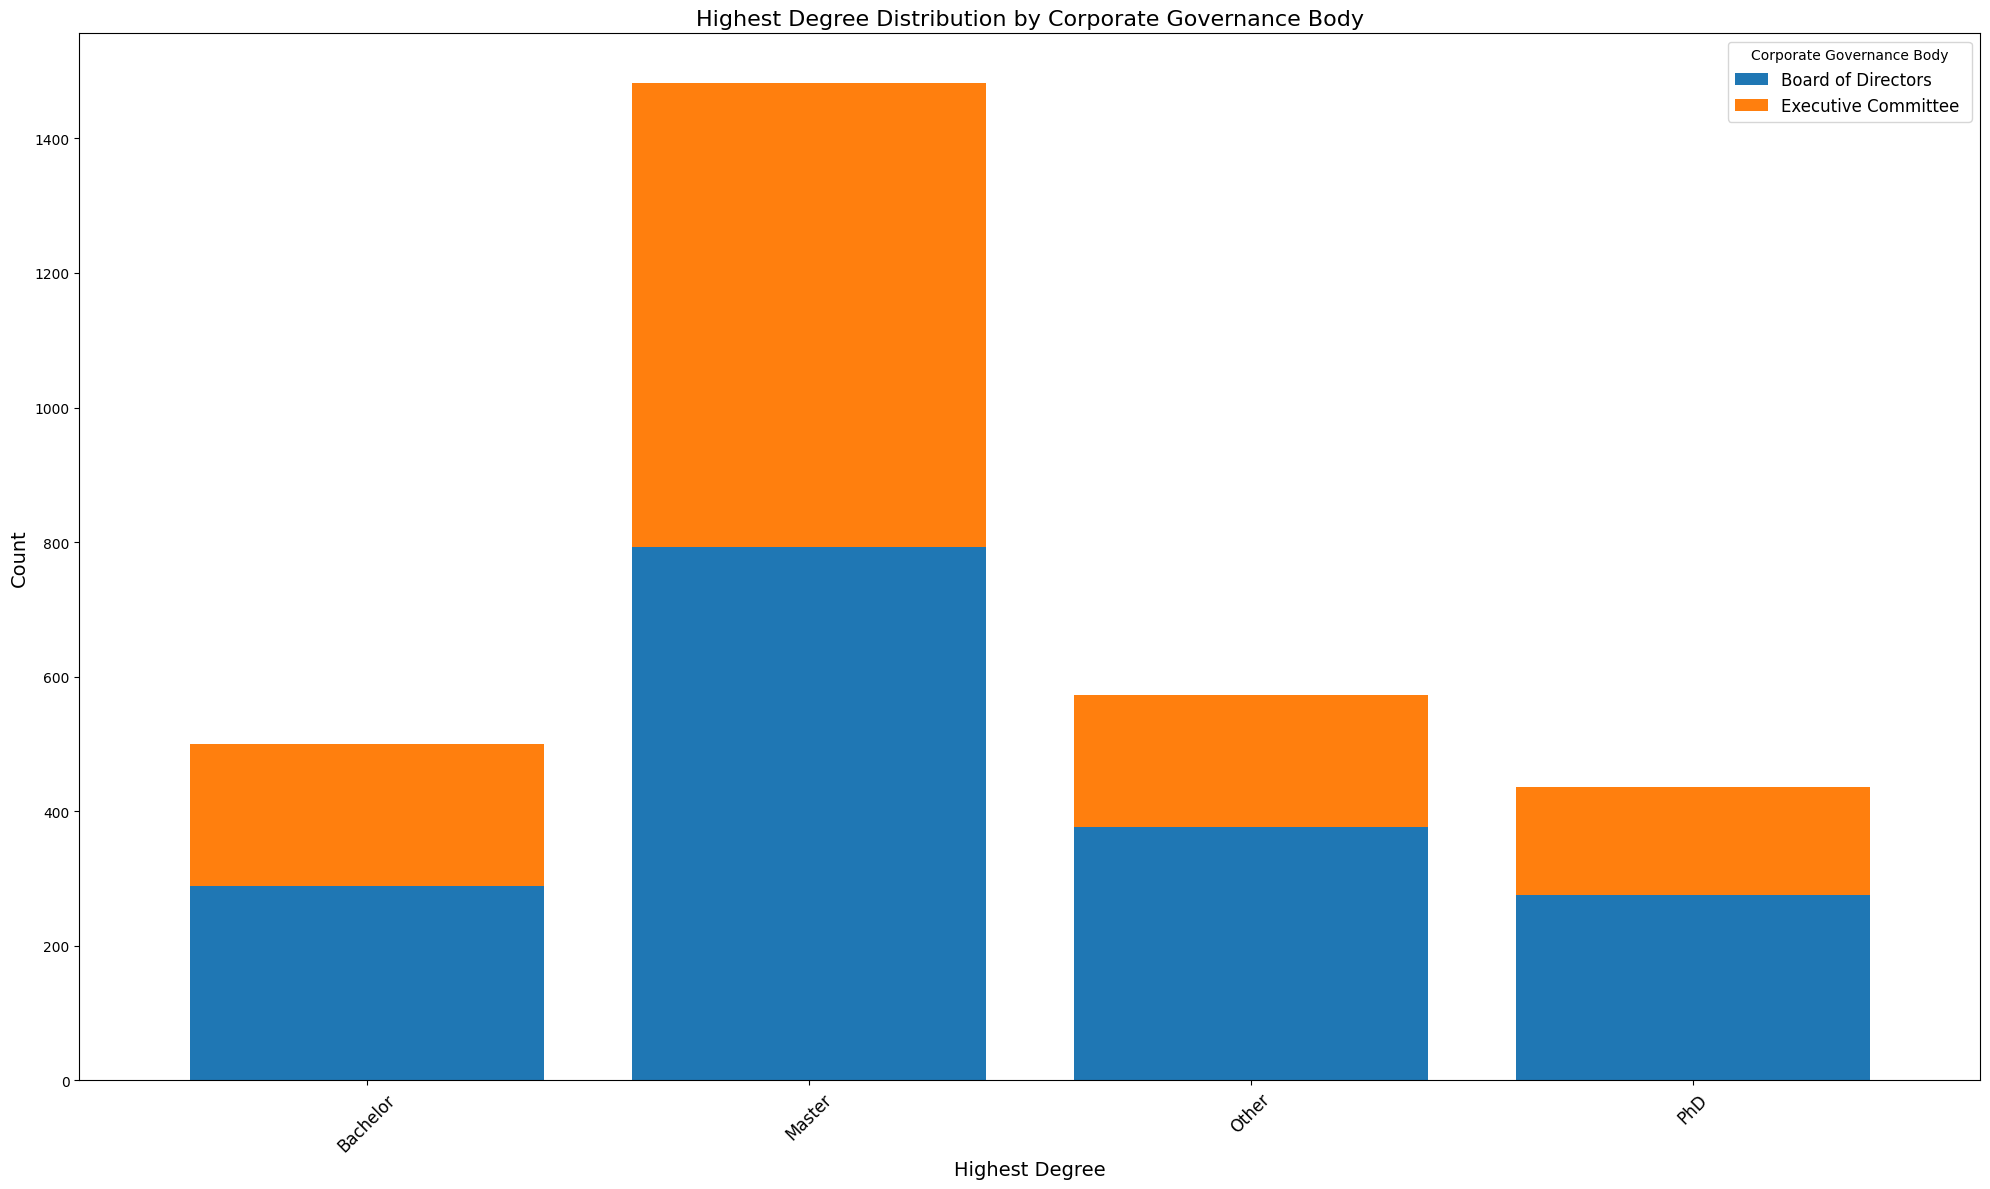

Corporate Governance Body,Board of Directors,Executive Committee
Highest Degree,,
Bachelor,289,211
Master,793,689
Other,377,195
PhD,275,161


In [10]:
{
    "tags": [
        "hide-input",
    ]
}

degree_counts = df.groupby(["Highest Degree", "Corporate Governance Body"]).size().unstack(fill_value=0)
degree_averages = degree_counts.mean(axis=0)

diversity_index = degree_counts.apply(shannon_diversity, axis=1)

fig, ax = plt.subplots(figsize=(20, 12))
degree_counts.plot(kind="bar", stacked=True, ax=ax, width=0.8)


plt.title("Highest Degree Distribution by Corporate Governance Body", fontsize=16)
plt.xlabel("Highest Degree", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Corporate Governance Body", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
degree_counts 



### Observations:
1. **Bachelor's Degrees**:
   - The **Board of Directors** has 289 members with a Bachelor's degree, while the **Executive Committee** has 211.
   - This suggests that individuals with a Bachelor's degree are more prevalent in the **Board of Directors** compared to the Executive Committee.

2. **Master's Degrees**:
   - Master's degrees dominate both governance bodies, with 793 in the **Board of Directors** and 689 in the **Executive Committee**.
   - This indicates that a Master's degree is the most common educational qualification for top leadership roles in both bodies.

3. **PhD Degrees**:
   - There are 275 PhD holders in the **Board of Directors**, compared to 161 in the **Executive Committee**.
   - The **Board of Directors** shows a higher representation of individuals with advanced academic qualifications.

4. **Other Qualifications**:
   - A significant number of "Other" qualifications are observed, with 377 in the **Board of Directors** and 195 in the **Executive Committee**.
   - This category might include vocational training, certifications, or unclassified degrees, which appear to have a notable presence, particularly in the Board of Directors.


### Some interesting insights:
1. **Higher Academic Credentials in the Board of Directors**:
   - The **Board of Directors** tends to have individuals with higher academic qualifications (Master's and PhDs) compared to the **Executive Committee**, suggesting that advanced degrees might be a more important criterion for governance roles than operational roles.

2. **Practical Experience in the Executive Committee**:
   - The **Executive Committee** has fewer PhDs and "Other" qualifications, indicating a potential emphasis on practical experience or managerial expertise over academic credentials.

3. **Master's Degree as the Standard**:
   - The dominance of Master's degrees in both governance bodies highlights its status as the most common entry requirement for top-level leadership roles.


## Age (as of 2024)

In [11]:
{
    "tags": [
        "hide-input",
    ]
}

# Data Cleaning
df['Age in 2024'] = pd.to_numeric(df['Age in 2024'], errors='coerce')



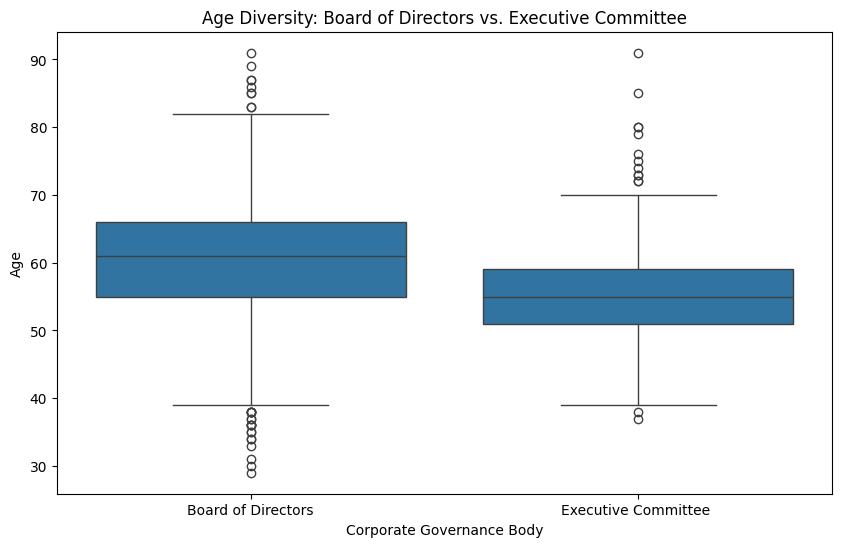

In [12]:
{
    "tags": [
        "hide-input",
    ]
}
# Boxplot for Age Diversity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Corporate Governance Body", y="Age in 2024")
plt.title("Age Diversity: Board of Directors vs. Executive Committee")
plt.ylabel("Age")
plt.xlabel("Corporate Governance Body")
plt.show()




### Observations:
1. **Median Age**:
   - The **Board of Directors** has a higher median age compared to the **Executive Committee**, indicating that members of the Board tend to be older.

2. **Age Range**:
   - The **Board of Directors** shows a wider age range, with several outliers on both the lower and higher ends.
   - The **Executive Committee** has a more compact age range, suggesting less variability in the ages of its members.

3. **Interquartile Range (IQR)**:
   - The IQR (middle 50% of the data) is larger for the **Board of Directors**, indicating greater variation in the typical ages of its members.
   - The **Executive Committee** has a narrower IQR, meaning the ages are more concentrated around the median.

4. **Outliers**:
   - The **Board of Directors** has several outliers at the lower end (younger members) and some at the higher end (older members), highlighting diversity in age.
   - The **Executive Committee** has fewer outliers, suggesting a more uniform age distribution.

### Interpretation:
- **Board of Directors**:
  - The broader age range and higher median suggest that the Board values experience and may include older members with extensive professional backgrounds.
  - The presence of younger outliers may indicate a trend toward including fresh perspectives or younger leadership voices.

- **Executive Committee**:
  - The tighter age range and lower median age suggest a preference for younger, more operationally active members, possibly reflecting the demands of the role.

- **Generational Mix**:
  - The **Board of Directors** benefits from a generational mix, potentially offering diverse perspectives.
  - The **Executive Committee** might prioritize age groups that align with strategic execution capabilities.

- **Succession Planning**:
  - The presence of younger outliers in the **Board of Directors** could be part of succession planning to groom future leaders.


In [13]:
{
    "tags": [
        "hide-input",
    ]
}

# Data Cleaning
df['Years in the company'] = pd.to_numeric(df['Years in the company'], errors='coerce')

## Seniority (Years in the Company)

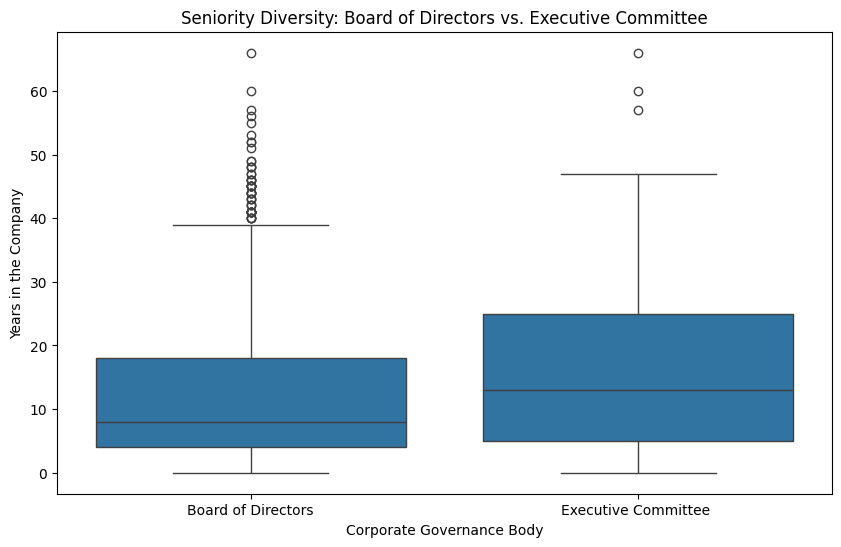

In [14]:
{
    "tags": [
        "hide-input",
    ]
}
# Boxplot for Seniority
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Corporate Governance Body", y="Years in the company")
plt.title("Seniority Diversity: Board of Directors vs. Executive Committee")
plt.ylabel("Years in the Company")
plt.xlabel("Corporate Governance Body")
plt.show()


### Observations:
1. **Median Seniority**:
   - The **Executive Committee** shows a slightly higher median for years in the company compared to the **Board of Directors**.
   - This suggests that members of the Executive Committee tend to have longer tenures within the organization.

2. **Interquartile Range (IQR)**:
   - The **Board of Directors** has a wider IQR, indicating greater variability in the seniority of its members.
   - The **Executive Committee** has a narrower IQR, suggesting a more consistent level of seniority among its members.

3. **Outliers**:
   - The **Board of Directors** shows a large number of outliers, with members having exceptionally long tenures (40+ years). This reflects the inclusion of long-serving individuals, possibly founders, advisors, or legacy members.
   - The **Executive Committee** also has some outliers, though fewer compared to the Board of Directors.

4. **Overall Range**:
   - Both governance bodies have members with short and long tenures, but the **Board of Directors** exhibits a broader range, extending to higher seniority levels.


### Interpretation:
- **Board of Directors**:
  - The diversity in seniority suggests a mix of newly appointed members and long-serving individuals, likely to balance fresh perspectives with historical continuity.
  - The high number of outliers indicates the presence of individuals with exceptional tenure, who might hold advisory or non-executive roles.

- **Executive Committee**:
  - The higher median and narrower range suggest that seniority is a critical factor for membership, reflecting the operational experience and institutional knowledge required for these roles.

1. **Experience vs. Fresh Perspectives**:
   - The **Board of Directors** appears to prioritize a mix of experienced and newer members, possibly to encourage diversity of thought in governance.
   - The **Executive Committee** leans more heavily on operational experience and continuity.

2. **Retention and Succession**:
   - The presence of long-serving members in both bodies highlights the need for succession planning to ensure smooth transitions in leadership.

3. **Role of Outliers**:
   - The outliers in seniority may play specialized roles, such as advising on legacy issues or ensuring stability during strategic shifts.

In [15]:
{
    "tags": [
        "hide-input",
    ]
}

# Clean numeric columns
numeric_columns = ['Years in the company', 'Year of Birth', 'Company Code', 'Year in function']
for col in numeric_columns:
    if col in df.columns: 
        df[col] = pd.to_numeric(df[col], errors='coerce')  

# Clean gender encoding
gender_mapping = {'M ': 'M', 'M\xa0': 'M', 'F ': 'F', 'F\xa0': 'F'}
df['Sex'] = df['Sex'].str.strip().replace(gender_mapping)  # Clean and replace



In [16]:

{
    "tags": [
        "hide-input",
    ]
}

# Step 3: Separate Data
board_data = df[df['Corporate Governance Body'] == 'Board of Directors']
exec_data = df[df['Corporate Governance Body'] == 'Executive Committee ']

board_percentages = board_data['Sex'].value_counts(normalize=True).to_dict()
exec_percentages = exec_data['Sex'].value_counts(normalize=True).to_dict()

gender_data = {
    'Corporate Governance Body': ['Board of Directors', 'Executive Committee'],
    'Male': [board_percentages['M'], exec_percentages['M']],
    'Female': [board_percentages['F'], exec_percentages['F']]
}



In [17]:
{
    "tags": [
        "hide-input",
    ]
}

# Combine the filtered age data for visualization
age_data = pd.concat([
    board_data[['Age in 2024']].assign(Group='Board of Directors'),
    exec_data[['Age in 2024']].assign(Group='Executive Committee')
])

# Combine age data for visualizatio
age_data = pd.concat([
    board_data[['Age in 2024']].assign(Group='Board of Directors'),
    exec_data[['Age in 2024']].assign(Group='Executive Committee')
])


### Defining metrics for statistical analysis

- Sex diversity: $$ d = 1 - \left| \frac{\text{Number of M} - \text{Number of F}}{\text{Total}}  \right| $$
This metric will have values close to one when there is diversity (around 50% men and 50% women) and gets closer to 0 when one sex dominates.

- For the nationality we can use the entropy, this values increases with diversity.
$$ H = -\sum_{i=1}^n p_i \log(p_i) \text{Where } p_i \text{ is the proportion of each country}$$

- For Age and Years in the companywe can use the standard deviation to measure diversity.

In [18]:
{
    "tags": [
        "hide-input",
    ]
}

# Function to compute sex diversity
def compute_sex_diversity(group):
    num_m = sum(group['Sex'] == 'M')
    num_f = sum(group['Sex'] == 'F')
    total = len(group)
    if total == 0:
        return np.nan
    return 1 - abs((num_m - num_f) / total)

# Function to compute entropy for nationality
def compute_entropy(group):
    nationality_counts = group['Nationality'].value_counts(normalize=True)
    return -np.sum(nationality_counts * np.log(nationality_counts))

def compute_metrics(df, body):
    sex_data = df[['Company Code', 'Sex']]
    nationality_data = df[['Company Code', 'Nationality']]
    age_data = df[['Company Code', 'Age in 2024']]
    years_data = df[['Company Code', 'Years in the company']]

    sex_diversity_metrics = sex_data.groupby('Company Code').apply(
        lambda group: pd.Series({
            f"Sex Diversity{body}": compute_sex_diversity(group)
        })
    )

    nationality_entropy_metrics = nationality_data.groupby('Company Code').apply(
        lambda group: pd.Series({
            f"Nationality Entropy{body}": compute_entropy(group)
        })
    )

    age_std_dev_metrics = age_data.groupby('Company Code').apply(
        lambda group: pd.Series({
            f'Age Std Dev{body}': group['Age in 2024'].std()
        })
    )

    years_std_dev_metrics = years_data.groupby('Company Code').apply(
        lambda group: pd.Series({
            f'Seniority Std Dev{body}': group['Years in the company'].std()
        })
    )
   
    sex_diversity_metrics = sex_diversity_metrics.reset_index()
    nationality_entropy_metrics = nationality_entropy_metrics.reset_index()
    age_std_dev_metrics = age_std_dev_metrics.reset_index()
    years_std_dev_metrics = years_std_dev_metrics.reset_index()

    # Merge the metrics DataFrames on 'Company Code'
    metrics = (
        sex_diversity_metrics
        .merge(nationality_entropy_metrics, on='Company Code', how='outer')
        .merge(age_std_dev_metrics, on='Company Code', how='outer')
        .merge(years_std_dev_metrics, on='Company Code', how='outer')
    )

    return metrics

#Computing metrics for Board of Directors and Executive Committee
board_metrics = compute_metrics(board_data, ' BOD')
exec_metrics = compute_metrics(exec_data, ' Exec')

We get the tables of the metrics we defined for the BOD and Exec. committee for each company. Then for each metric we perfom a linear regression to analyse the relatioships between the pairs of metrics, or in other terms if the diversity of the BOD and impacts the diversity of the Exec. committee and the statistical significance of these findings (for example, we inspect the relationship between sex diversity for both bodies and check if it's statistically significant...)

In [19]:
{
    "tags": [
        "hide-input",
    ]
}
sex_metrics = board_metrics.loc[:, ['Company Code', 'Sex Diversity BOD']].merge(exec_metrics.loc[:, ['Company Code', 'Sex Diversity Exec']], on='Company Code', how='outer')
sex_metrics = sex_metrics.dropna()

nationality_metrics = board_metrics.loc[:, ['Company Code', 'Nationality Entropy BOD']].merge(exec_metrics.loc[:, ['Company Code', 'Nationality Entropy Exec']], on='Company Code', how='outer')
nationality_metrics = nationality_metrics.dropna()

age_metrics = board_metrics.loc[:, ['Company Code', 'Age Std Dev BOD']].merge(exec_metrics.loc[:, ['Company Code', 'Age Std Dev Exec']], on='Company Code', how='outer')
age_metrics = age_metrics.dropna()

seniority_metrics = board_metrics.loc[:, ['Company Code', 'Seniority Std Dev BOD']].merge(exec_metrics.loc[:, ['Company Code', 'Seniority Std Dev Exec']], on='Company Code', how='outer')
seniority_metrics = seniority_metrics.dropna()

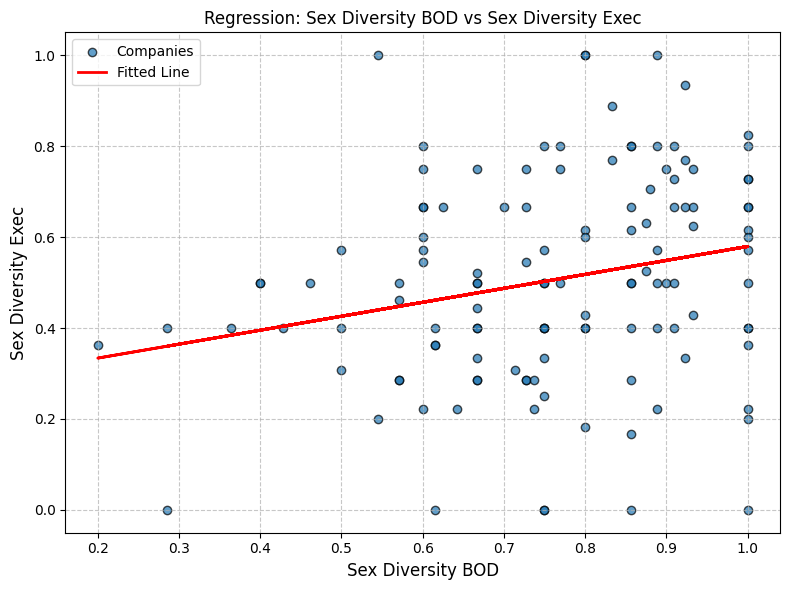

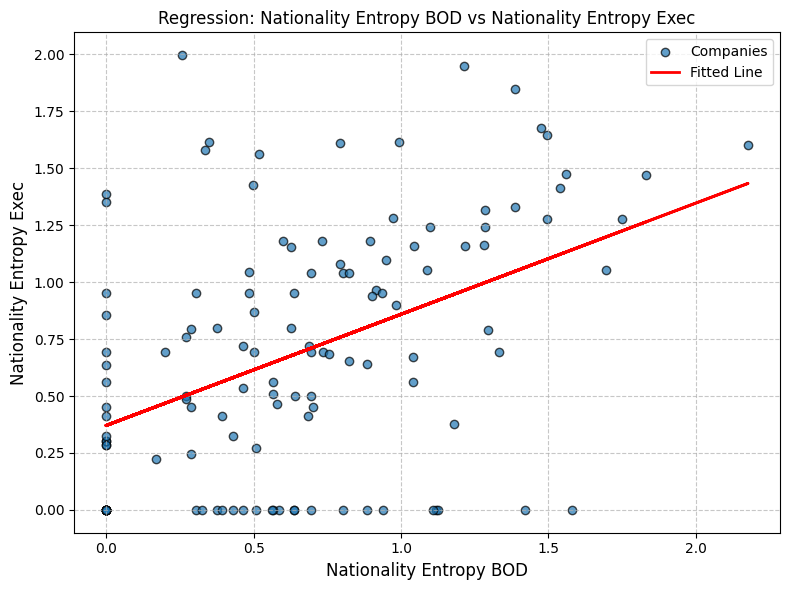

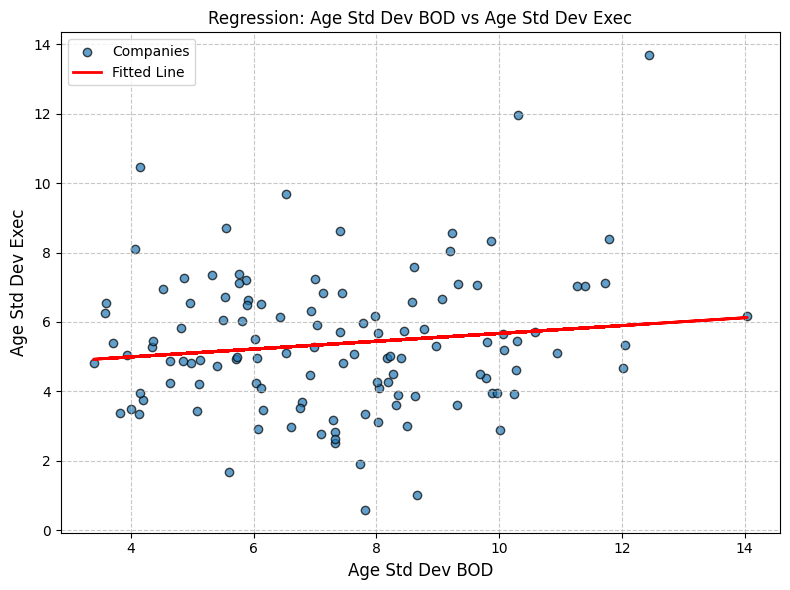

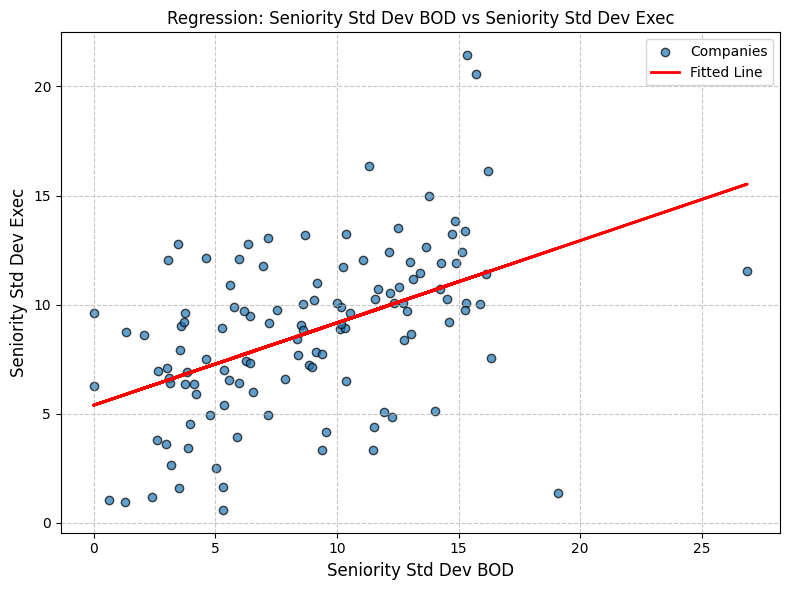

In [26]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings
{
    "tags": [
        "hide-input",
    ]
}

# Initialize a list to store regression results
results = []

# Define metric names and data
metric_pairs = [
    ('Sex Diversity BOD', 'Sex Diversity Exec', sex_metrics),
    ('Nationality Entropy BOD', 'Nationality Entropy Exec', nationality_metrics),
    ('Age Std Dev BOD', 'Age Std Dev Exec', age_metrics),
    ('Seniority Std Dev BOD', 'Seniority Std Dev Exec', seniority_metrics)
]

for bod_metric, exec_metric, metrics in metric_pairs:
    X = metrics[bod_metric]
    Y = metrics[exec_metric]
    
    # Perform linear regression
    X_with_const = sm.add_constant(X) 
    model = sm.OLS(Y, X_with_const).fit()
    
    # Get regression coefficient and p-value
    coef = model.params[1]  
    p_value = model.pvalues[1] 
    
    # Store the results
    results.append({
        'Metric': bod_metric[:-3],
        'Coefficient': coef,
        'P-value': p_value
    })
    
    # Plot the data and fitted line
    plt.figure(figsize=(8,6))
    plt.scatter(X, Y, label='Companies', alpha=0.7, edgecolors='k')
    plt.plot(X, model.predict(X_with_const), color='red', label='Fitted Line', linewidth=2)
    plt.title(f'Regression: {bod_metric} vs {exec_metric}', fontsize=12,)
    plt.xlabel(bod_metric, fontsize=12)
    plt.ylabel(exec_metric, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Convert results to a DataFrame for summary
results_df = pd.DataFrame(results)



In [21]:
results_df

,Metric,Coefficient,P-value
0,Sex Diversity,0.306765,8.480977e-03
1,Nationality Entropy,0.487927,2.844031e-07
2,Age Std Dev,0.112905,1.590124e-01
3,Seniority Std Dev,0.377583,4.890810e-08


From the table, sex, nationality and seniority we have positive coefficients which means that the impact from the board of directors on the executive committees of the companies is positive. In other words, the more diverse the BOD is, it is more likely to see a high diversity in the executive committee. This is confirmed by the p-values which are smaller than 0.05, which means that our findings are statistically significant.
For age, since p-value > 0.05, we can't conlude anything.

## Employer Typologgy

We compute the metrics for every company (without splitting between the two bodies)

In [22]:
company_metrics = compute_metrics(df, '')
company_metrics.head()

,Company Code,Sex Diversity,Nationality Entropy,Age Std Dev,Seniority Std Dev
0,1,0.785714,1.046793,7.448234,15.529968
1,2,0.555556,0.720125,4.543544,6.046930
2,3,0.529412,1.001189,5.797910,12.889660
3,4,0.428571,0.163024,8.464367,15.699853
4,5,0.857143,0.348832,7.343608,10.028805


In order to classify the companies, we make a composite score explaining diversity using the four metrics we created.
The composite metric is the following: $$ \text{Composite score} = w_1 \frac{\text{Sex Diversity}}{\text{Optimal Value for Sex Diversity}} + w_2 \frac{\text{Nationality Entropy}}{\text{Optimal Value for Nationality Entropy}} + w_3 \frac{\text{Age Std}}{\text{Optimal Value for Age Std}} + w_4 \frac{\text{Seniority Std}}{\text{Optimal Value for Seniority Std}}$$

Where $w_i$ are the weights we choose to give to each metric, depending on what we think is the most important.
We choose the following weights:
- $w_1$ = 0.3
- $w_2$ = 0.3
- $w_3$ = 0.2
- $w_4$ = 0.2

And by the optimal value for each metric we mean a value that would explain the highest diversity. We normalise with this value in order for the values to have the same scale around the interval $\left[0,1\right]$ so our composite metric would be well defined.
For our case we choose:
- Optimal Value for Sex: 1, since the diversity is the highest when the metric reaches one.
- Optimal Value for Nationality: we choose the maximum entropy in our data to keep things simple.
- Optimal value for Age: we can see the optimal value as the standard deviation of a uniformly distributes random variable of parameters $a = 18$ (hypothetical minimum working age) and $b = 80$ (hypothetical maximal age of an employee), this value is $\frac{b - a}{\sqrt{12}}$.
- Optimal value for Seniority: following the same approach, we can see the optimal value as the standard deviation of a uniformly distributes random variable of parameters $a = 0$ and $b = 62$ (max age - min age), this value is $\frac{b - a}{\sqrt{12}}$.

In order to classify each company, we choose some thresholds:
- A company is classified as 'Highly Diverse' if the score is above 0.65.
- A company is classified as 'Diverse' if the score is between 0.5 and 0.65.
- A company is classified as 'Less Diverse' if the score is between 0.35 and 0.5.
- A company is classified as 'Not Diverse' if the score is below 0.35.

In [23]:
{
    "tags": [
        "hide-input",
    ]
}

def compute_composite_score(row, body, max_values, weights):
    # Normalize metrics by their respective max values
    sex_diversity_norm = row[f'Sex Diversity{body}'] / max_values['Sex Diversity']
    nationality_entropy_norm = row[f'Nationality Entropy{body}'] / max_values['Nationality Entropy']
    age_std_norm = row[f'Age Std Dev{body}'] / max_values['Age Std Dev']
    seniority_std_norm = row[f'Seniority Std Dev{body}'] / max_values['Seniority Std Dev']
    
    # Compute composite score
    composite_score = (
        weights['Sex Diversity'] * sex_diversity_norm +
        weights['Nationality Entropy'] * nationality_entropy_norm +
        weights['Age Std Dev'] * age_std_norm +
        weights['Seniority Std Dev'] * seniority_std_norm
    )
    return composite_score

def classify_based_on_composite_score(score):
    if score < 0.35:
        return 'Not Diverse'
    elif score < 0.5:
        return 'Less Diverse'
    elif score < 0.65:
        return 'Diverse'
    else:
        return 'Highly Diverse'

# Define maximum observed values for normalization
max_values = {
    'Sex Diversity': 1,
    'Nationality Entropy': company_metrics['Nationality Entropy'].max(),
    'Age Std Dev': (80 - 18)/np.sqrt(12),
    'Seniority Std Dev': (62 - 0)/np.sqrt(12)
}

# Define weights for each metric
weights = {
    'Sex Diversity': 0.3,
    'Nationality Entropy': 0.3,
    'Age Std Dev': 0.2,
    'Seniority Std Dev': 0.2
}

# Apply the functions to compute scores and classifications
company_metrics['Composite Score'] = company_metrics.apply(
    compute_composite_score, axis=1, body='', max_values=max_values, weights=weights
)
company_metrics['Diversity Classification'] = company_metrics['Composite Score'].apply(classify_based_on_composite_score)
company_metrics.head()

,Company Code,Sex Diversity,Nationality Entropy,Age Std Dev,Seniority Std Dev,Composite Score,Diversity Classification
0,1,0.785714,1.046793,7.448234,15.529968,0.640659,Diverse
1,2,0.555556,0.720125,4.543544,6.046930,0.386945,Less Diverse
2,3,0.529412,1.001189,5.797910,12.889660,0.509367,Diverse
3,4,0.428571,0.163024,8.464367,15.699853,0.421671,Less Diverse
4,5,0.857143,0.348832,7.343608,10.028805,0.500649,Diverse


Employer Typology Counts:
 Diversity Classification
Not Diverse        7
Less Diverse      52
Diverse           62
Highly Diverse    11
Name: count, dtype: int64


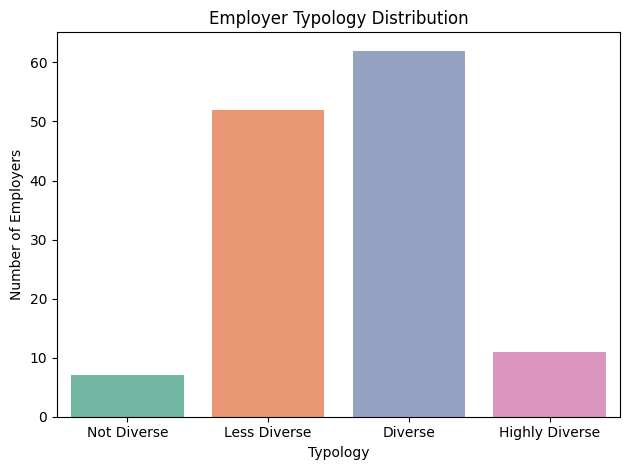

In [24]:
{
    "tags": [
        "hide-input",
    ]
}

# Desired order of categories
desired_order = ["Not Diverse", "Less Diverse", "Diverse", "Highly Diverse"]

# Reorder the `typology_counts` to follow the desired order
typology_counts = company_metrics['Diversity Classification'].value_counts()
typology_counts = typology_counts.reindex(desired_order, fill_value=0)
print("Employer Typology Counts:\n", typology_counts)

# Visualization
sns.barplot(x=typology_counts.index, y=typology_counts.values, palette='Set2')
plt.title('Employer Typology Distribution')
plt.xlabel('Typology')
plt.ylabel('Number of Employers')
plt.tight_layout()
plt.show()